# Digit Classification with (using MNIST Data set)

In [1]:
#import tensorflow and other necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io as io
from skimage import util
from skimage import transform

In [2]:
#load mnist Dataset from keras API and split into train and test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Explore the format of the dataset before training the model


In [3]:
#Number of images in testing and training test
print(len(x_train))
print(len(x_test))
#Dimensions of data
print(x_train.shape)
#Type of data
print(x_train.dtype)
print(y_train[0])

60000
10000
(60000, 28, 28)
uint8
5


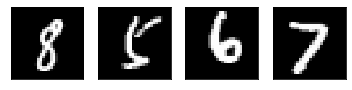

In [4]:
#display few random images from the training set.
rand_im = [300, 2250, 3650, 4000]

for i in range(len(rand_im)):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[rand_im[i]], cmap="gray")
plt.show()

# Preprocessing the data

In [5]:
#Flatten images before training
x_tr_flat = x_train.reshape(60000, 784)
x_te_flat = x_test.reshape(10000, 784)
#change datatype from uint8 to float32 and scale it between 0 and 1
x_tr_flat = x_tr_flat.astype('float32') / 255.0
x_te_flat = x_te_flat.astype('float32') / 255.0
#convert array of labeled data to one-hot vector.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
#explore the data after pre-processing 
print(x_tr_flat.shape)
print(x_te_flat.shape)
print(y_test.shape)
print(x_tr_flat.dtype)
print(y_train[0])

(60000, 784)
(10000, 784)
(10000, 10)
float32
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the neural network

In [8]:
#Define a tensor as placeholders to feed values later
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None,10])

In [9]:
#Declare variables for weight and bias
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
#implement the model
y = tf.nn.softmax((tf.matmul(x, W) + b))

In [10]:
#implement the cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [11]:
#optimization function
train_op = tf.train.AdamOptimizer().minimize(cross_entropy)

# Training the network

In [12]:
#train the neural network , run 500 epochs
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(501):
    _,loss=sess.run([train_op,cross_entropy], feed_dict={x: x_tr_flat,y_ :y_train})
    if i % 100 == 0:
        print("loss at step {0}: {1}".format(i, loss))
    

loss at step 0: 2.3025989532470703
loss at step 100: 0.6389413475990295
loss at step 200: 0.4619087874889374
loss at step 300: 0.39445775747299194
loss at step 400: 0.35786184668540955
loss at step 500: 0.334479421377182


In [13]:
#Define correct prediction
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#define accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
#calculate accuracy for training dataset
print(sess.run(accuracy, feed_dict={x: x_tr_flat, y_: y_train}))

0.91181666


In [15]:
#calculate accuracy for testing dataset
print(sess.run(accuracy, feed_dict={x: x_te_flat, y_:y_test}))

0.9137


# Evaluating the model

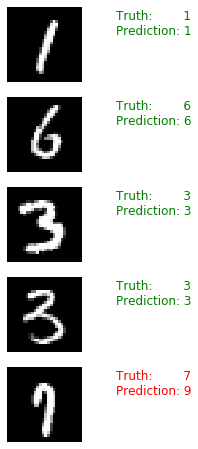

In [16]:
#To evaluate the model, Pick 5 random images from test dataset
sample_indexes = [5,50,500,5000,5600]
sample_images = [x_te_flat[i] for i in sample_indexes]
sample_labels = [y_test[i] for i in sample_indexes]
#predict the label, feed the sample images
pred = sess.run(tf.argmax(y, 1), feed_dict={x: sample_images})
predicted=np.squeeze(pred)                     

# Display the predictions and the actual label.
fig = plt.figure(figsize=(8, 8))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5,1,1+i)
    plt.axis('off')
    color='green' if np.argmax(truth) == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(np.argmax(truth), prediction), 
             fontsize=12, color=color)
    plt.imshow(x_test[sample_indexes[i]],  cmap="gray")

plt.show()

# Testing a new image (my own handwriting)

In [17]:
#Import image from local space
img_2=skimage.data.imread('/home/thasleem/my_samples/two.jpeg')
#convert to grayscale
img_2=img_2[:,:,0]
#invert the image 
resize_2=util.invert(img_2)
#resize it to 28*28
r_image_2=([transform.resize(resize_2, (28,28))])
#Flatten the image to 1D
resized_img_2=np.array(r_image_2).reshape(1,784)

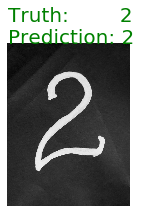

In [18]:
#predict the label, feed a sigle image
pred = sess.run(tf.argmax(y, 1), feed_dict={x:resized_img_2})
predicted=np.squeeze(pred) 

# Display the predictions and the actual label.
fig = plt.figure(figsize=(3, 3))
plt.axis('off')
color='green' if 2 == predicted else 'red'
plt.imshow(resize_2,  cmap="gray")
plt.text(10, 10, "Truth:        {0}\nPrediction: {1}".format(2, predicted),fontsize=20, color=color)
plt.show()